# ELE510 Image Processing and Computer Vision: LAB, Exercise  4, Spatial-domain filters Part II. Non-Linear Filtering.

**Purpose:** *To learn about Non-Linear Filters and its use in computer vision (image processing). Some basic experiments will be implemented using Pyhon, OpenCV and other packages.*

Read the text carefully before starting the work. In many cases it is necessary to do some preparations before you start the work on the computer. Read the necessary theory and answer the theoretical part first. The theoretical and experimental part should be solved individually. The notebook must be approved by the lecturer or the teaching assistants. 

The theory for this exercise can be found in chapter 5 of the text book [1]. See also the following documentations for help:
- [OpenCV](https://docs.opencv.org/4.8.0/d6/d00/tutorial_py_root.html)
- [numpy](https://numpy.org/doc/stable/)
- [matplotlib](https://matplotlib.org/stable/users/index.html)
- [sklearn](https://scikit-learn.org/stable/)
- [scipy](https://scipy.org/)

<div class="alert alert-block alert-info">
Please, make sure that you have previously installed all the packages contained in the `requirements.txt` file.
</div>

**Approval:**
<div class="alert alert-block alert-success">
The current notebook should be submitted on CANVAS as a single PDF file. Read the `ELE510_Getting_started.pdf` file for more information.
</div>

## Note regarding the notebook

- You will find placeholders marked with `...` throughout the code. Your task is to replace each `...` with the appropriate code. Ensure that each placeholder is properly filled in to complete the implementation.

- The theoretical questions have to be answered directly on the notebook using the *Markdown* cells marked as **Answer here**. LaTex commands (if relevant) are available using the command `$...$`. You can also attach a scan (or an image) of the answer directly in the cell.

Possible ways to insert an image in the markdown cell:

`![image name]("image_path")`

`<img src="image_path" alt="Alt text" title="Title text" />`

## Problem 1

In the previous assignment (problem 1), we evaluated how two well-known linear filters (box and Gaussian filters) performed on noise removal considering Gaussian noise and salt-and-pepper noise. We saw that Gaussian filters performed better than box filters in both scenarios due to the less weight given by Gaussian filters to the pixels further from the center of the window. However, removing salt-and-pepper noise was more challenging when using linear filters. 

Throughout this assignment, we will learn that different types of noise need different filters. Particularly, in this first exercise, we will reply the same problem but, this time, we will employ the median filter to solve the salt-and-pepper noise.

**a)** Briefly explain how a median filter works.

Its a non linear filtering technique, for the given filter we take all the values and sort them into a list, then pick the middle number.

**b)** Implement the same Gaussian filters used in Lab3: 

**g1**: $\sigma = 0.5$, $K = 5$

**g2**: $\sigma = 1.0$, $K = 9$

**g3**: $\sigma = 1.5$, $K = 13$

Compare the results of filtering Gaussian noise and salt-and-pepper noise with both a Gaussian filter and the median filter with a kernel size of 3. Use the `cameraman.jpg` image.

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt 
import cv2
from skimage.util import random_noise
from scipy import ndimage

In [2]:
# Gaussian filters
g1 = ...
g2 = ...
g3 = ..

# Read the image in grayscale
Im = ...

# Add noise
Im_gauss = ... # Gaussian white noise with variance of 0.01 and zero mean
Im_SP = ... # Salt and pepper noise on 5% of the pixels

# Show images
plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(Im, cmap='gray')
plt.title('Original image')
plt.subplot(132), plt.imshow(Im_gauss, cmap='gray')
plt.title('Gaussian noise')
plt.subplot(133), plt.imshow(Im_SP, cmap='gray')
plt.title('Salt-and-pepper noise')
plt.show()

SyntaxError: invalid syntax (823151097.py, line 4)

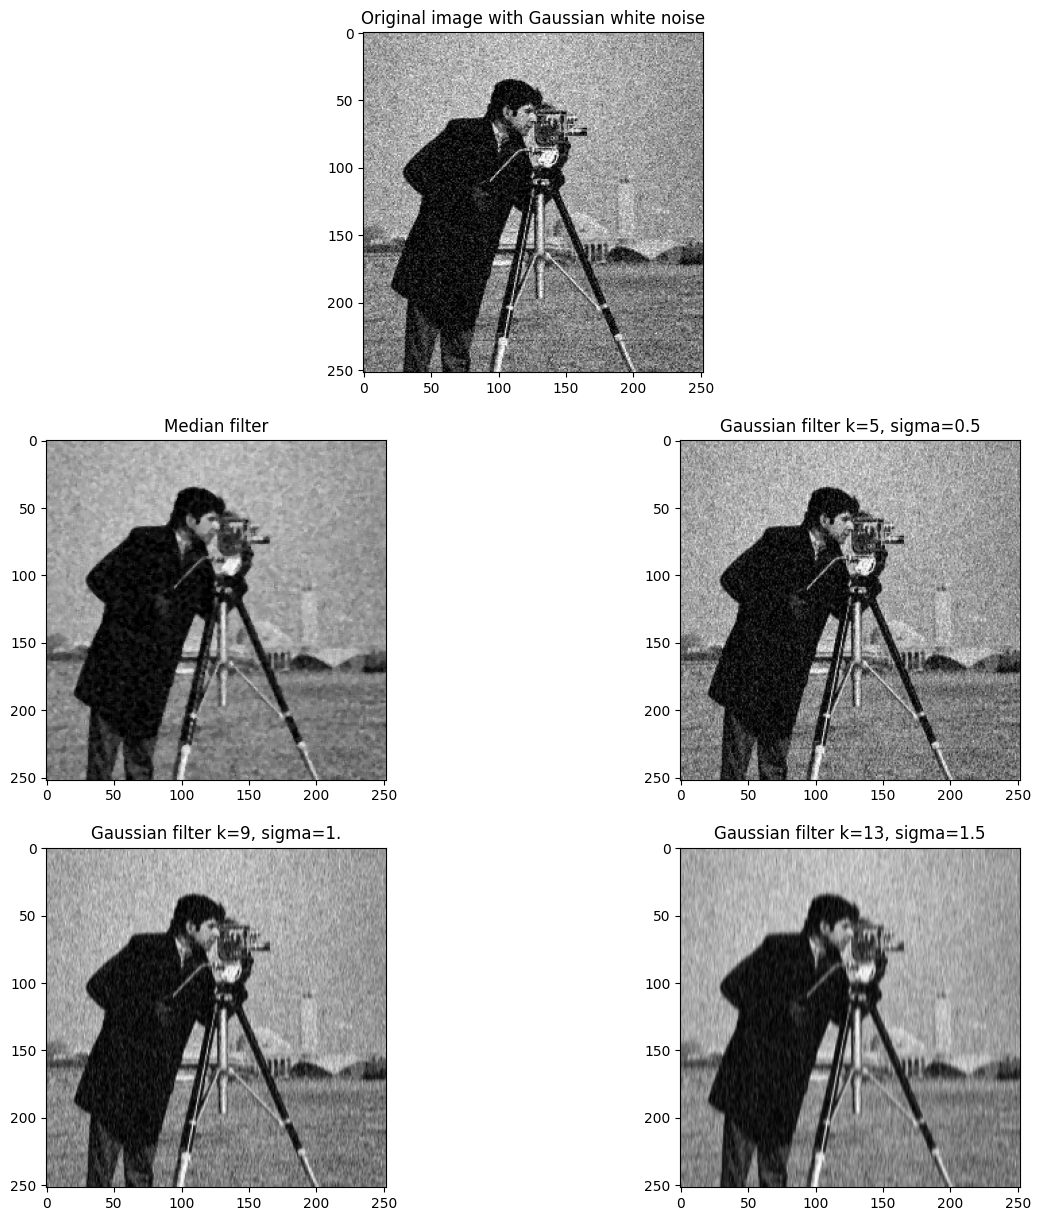

In [4]:
# Filtering Gaussian noise
Im_gauss_m1 =  cv2.medianBlur((Im_gauss*255).astype(np.uint8), 3)    # Median filter of size 3
Im_gauss_g1 = cv2.filter2D(Im_gauss, -1, g1)
Im_gauss_g2 = cv2.filter2D(Im_gauss, -1, g2)
Im_gauss_g3 = cv2.filter2D(Im_gauss, -1, g3)

# Show results
plt.figure(figsize=(15,15))
plt.subplot(3,2,(1,2)), plt.imshow(Im_gauss, cmap='gray')
plt.title("Original image with Gaussian white noise")
plt.subplot(323), plt.imshow(Im_gauss_m1, cmap='gray')
plt.title('Median filter')
plt.subplot(324), plt.imshow(Im_gauss_g1, cmap='gray')
plt.title('Gaussian filter k=5, sigma=0.5')
plt.subplot(325), plt.imshow(Im_gauss_g2, cmap='gray')
plt.title('Gaussian filter k=9, sigma=1.')
plt.subplot(326), plt.imshow(Im_gauss_g3, cmap='gray')
plt.title('Gaussian filter k=13, sigma=1.5')
plt.show()

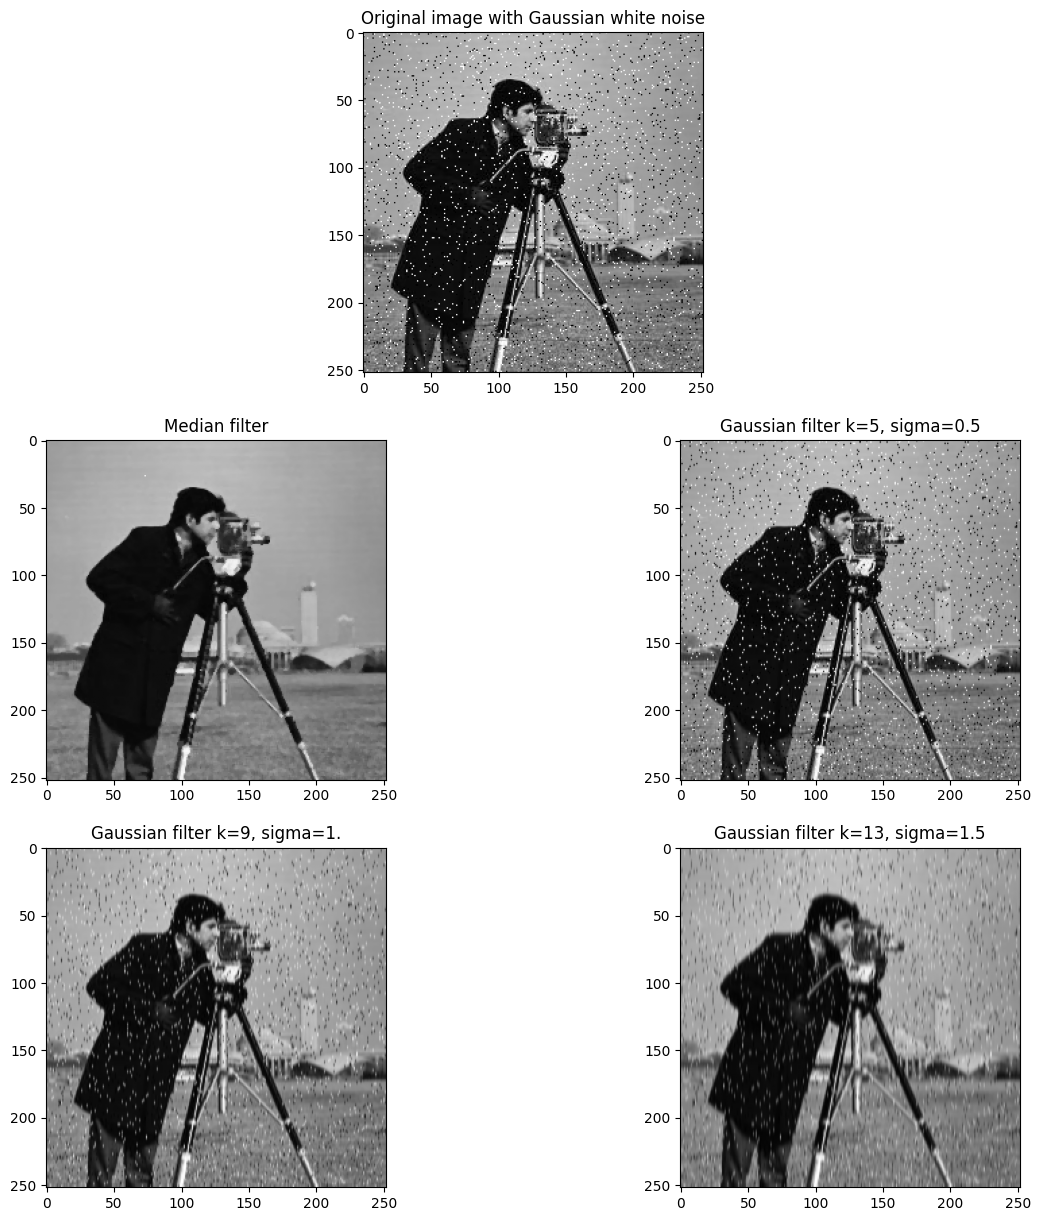

In [5]:
# Filtering S&P noise
Im_sp_m1 = cv2.medianBlur((Im_SP*255).astype(np.uint8), 3) # Median filter of size 3
Im_sp_g1 = cv2.filter2D(Im_SP, -1, g1)
Im_sp_g2 = cv2.filter2D(Im_SP, -1, g2)
Im_sp_g3 = cv2.filter2D(Im_SP, -1, g3)

# Show results
plt.figure(figsize=(15,15))
plt.subplot(3,2,(1,2)), plt.imshow(Im_SP, cmap='gray')
plt.title("Original image with Gaussian white noise")
plt.subplot(323), plt.imshow(Im_sp_m1, cmap='gray')
plt.title('Median filter')
plt.subplot(324), plt.imshow(Im_sp_g1, cmap='gray')
plt.title('Gaussian filter k=5, sigma=0.5')
plt.subplot(325), plt.imshow(Im_sp_g2, cmap='gray')
plt.title('Gaussian filter k=9, sigma=1.')
plt.subplot(326), plt.imshow(Im_sp_g3, cmap='gray')
plt.title('Gaussian filter k=13, sigma=1.5')
plt.show()

**c)** Explain the results obtained regarding the performance between the median filter and the Gaussian filter, and regarding noise removal.

Gausian filter removed the noise much better but also lost some detail. Still performed better

## Problem 2

So far, we have explained some simple filters whose main goal is to smooth an input image. However, sometimes these filters do not only dissolve the noise, but also smooth away the edges and the details. In this problem, we will evaluate two non-linear filters that aim to retain the information regarding edges (bilateral filter) or fine details (non-local means filter) while reducing the noise. 

We will use the `noise_example.jpg` image (in RGB color) for this problem.

Bilateral filtering time with size 9 and sigma 50: 0.01438 seconds
Bilateral filtering time with size 18 and sigma 50: 0.02170 seconds
Bilateral filtering time with size 27 and sigma 50: 0.05654 seconds


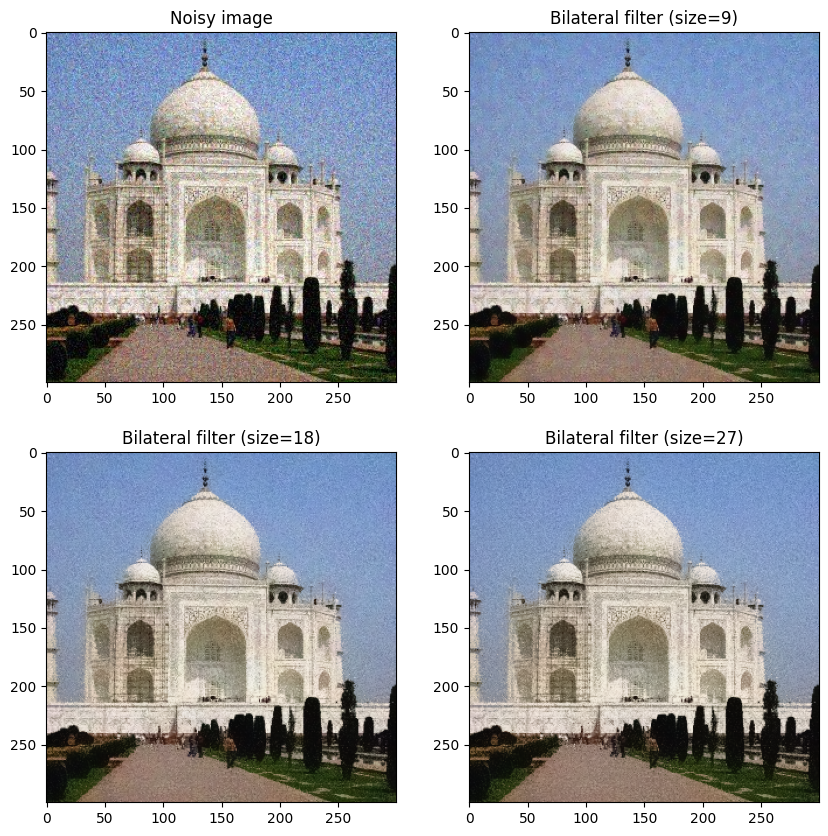

In [6]:
from time import time

# Function to implement a bilateral filter
def myBilateralFilter(img, size, sigma):

    time_i = time()
    dst = cv2.bilateralFilter(src=img,
                              dst=None,
                              d=size, # diameter of each pixel neighborhood
                              sigmaColor=sigma, # filter sigma in color space
                              sigmaSpace=sigma) # filter sigma in coordinate space
    
    print("Bilateral filtering time with size %d and sigma %d: %.5f seconds" % (size, sigma, time()-time_i)) 
    
    return dst

# Read image in RGB
img = cv2.cvtColor(cv2.imread("./images/noise_example.jpg"), cv2.COLOR_BGR2RGB)

# Define default parameters
sigma = 50
size = 9

# Bilateral filters
b1 = myBilateralFilter(img, size, sigma)
b2 = myBilateralFilter(img, size*2, sigma)
b3 = myBilateralFilter(img, size*3, sigma)

plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(img), plt.title("Noisy image")
plt.subplot(222), plt.imshow(b1), plt.title('Bilateral filter (size=9)')
plt.subplot(223), plt.imshow(b2), plt.title('Bilateral filter (size=18)')
plt.subplot(224), plt.imshow(b3), plt.title('Bilateral filter (size=27)')
plt.show()

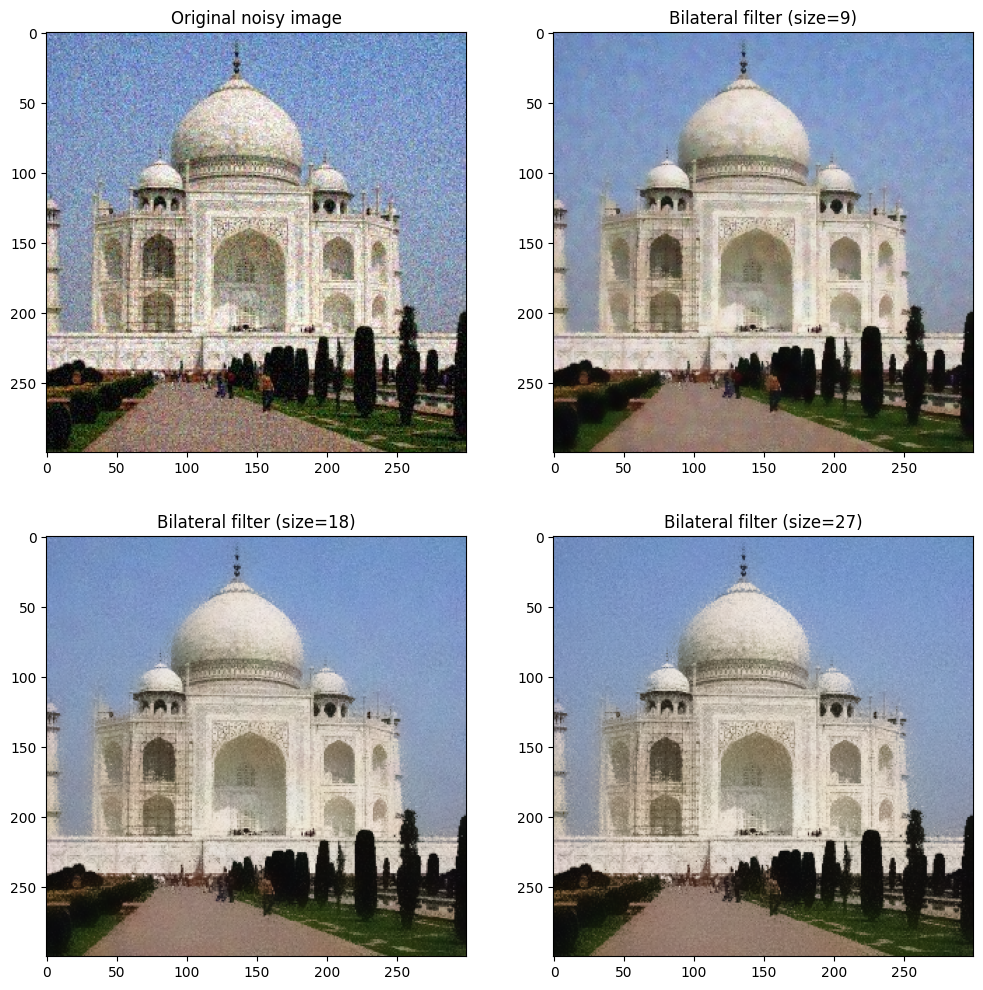

In [7]:

b1 = cv2.bilateralFilter(src=img, d=9, sigmaColor=75, sigmaSpace=75)
b2 = cv2.bilateralFilter(src=img, d=18, sigmaColor=75, sigmaSpace=75)
b3 = cv2.bilateralFilter(src=img, d=27, sigmaColor=75, sigmaSpace=75)

plt.figure(figsize=(12,12))
plt.subplot(221), plt.imshow(img), plt.title("Original noisy image")
plt.subplot(222), plt.imshow(b1), plt.title("Bilateral filter (size=9)")
plt.subplot(223), plt.imshow(b2), plt.title("Bilateral filter (size=18)")
plt.subplot(224), plt.imshow(b3), plt.title("Bilateral filter (size=27)")
plt.show()

**a)** Implement a bilateral filter using `cv2.bilateralFilter`([Documentation](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed)) with a filter size of 9. For simplicity, we will use of the same $\sigma=75$ value for both the color space and the coordinate space. What happens if we increase the filter size? Comment the results.

With increase in size, the noise is reduced better but detail is also lost.

**b)** What about if we change the value of $\sigma$ while keeping a filter size of 9? Use both a very small (<10) and a very large (>150) $sigma$ value to filter the previous image. Display the resulting image and comment the results.

Bilateral filtering time with size 9 and sigma 5: 0.00629 seconds
Bilateral filtering time with size 9 and sigma 200: 0.00807 seconds


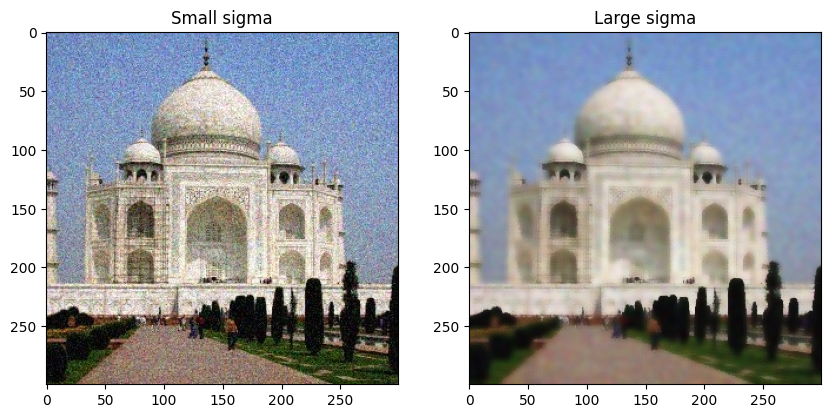

In [8]:
# Define parameters
size = 9

# Bilateral filters
b4 = myBilateralFilter(img, size, 5) # small sigma
b5 = myBilateralFilter(img, size, 200) # large sigma

plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(b4), plt.title("Small sigma")
plt.subplot(122), plt.imshow(b5), plt.title('Large sigma')
plt.show()

Small sigma is more selective leading to less noise reduction/less detail loss
Big sigma is less selective leading to agressive noise reduction but loss in detail too.

**c)** Now, let's implement a NLM filter. There are multiple versions of the NLM filter in OpenCV. Since our image is RGB, we will use `cv2.fastNlMeansDenoisingColored`([Documentation](https://docs.opencv.org/4.10.0/d1/d79/group__photo__denoise.html#ga03aa4189fc3e31dafd638d90de335617)) with a filter strength of 10. For simplicity, we will use of the default values for the remaining parameters. What happens if we increase the filter strength? Comment the results and compare them .

NLM filtering time with strength 10: 0.58894 seconds
NLM filtering time with strength 20: 0.39797 seconds
NLM filtering time with strength 30: 0.39882 seconds


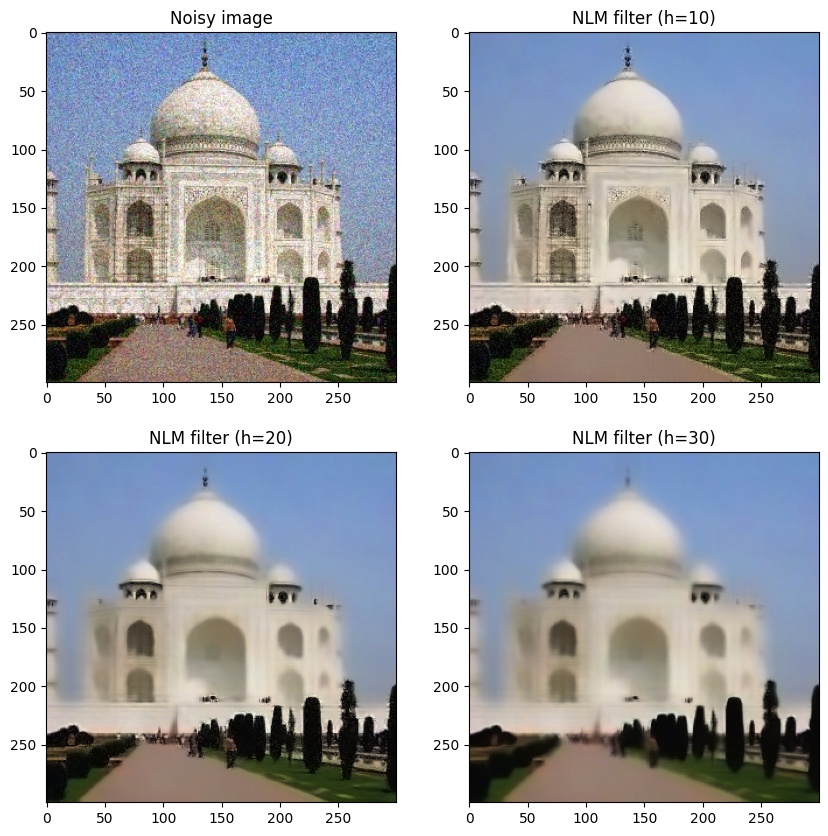

In [10]:
# Function to implement a bilateral filter
def myNLMlFilter(img, h):

    time_i = time()
    dst = cv2.fastNlMeansDenoisingColored(src=img,
                                          dst=None,
                                          h=h, # filter strength
                                          hColor=h, # same as h, but for color components
                                          searchWindowSize=21, # default value 
                                          templateWindowSize=7) # default value 
    
    print("NLM filtering time with strength %d: %.5f seconds" % (h, time()-time_i)) 
    
    return dst

# Read image in RGB
img = cv2.cvtColor(cv2.imread("./images/noise_example.jpg"), cv2.COLOR_BGR2RGB)

# Define default parameter
H = 10

# NLM filters
nlm1 = myNLMlFilter(img, H)
nlm2 = myNLMlFilter(img, H*2) # strength*2
nlm3 = myNLMlFilter(img, H*3) # strength*3

plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(img), plt.title("Noisy image")
plt.subplot(222), plt.imshow(nlm1), plt.title('NLM filter (h=10)')
plt.subplot(223), plt.imshow(nlm2), plt.title('NLM filter (h=20)')
plt.subplot(224), plt.imshow(nlm3), plt.title('NLM filter (h=30)')
plt.show()

**Answer here**

**d)** From the previously observed results, comment on the differences between bilateral and NLM filters, including the advantages and disadvantages of each filter.

bilateral filter mainly preserves edges while smoothing it blurs when the neighborhood is too big

nlm retains fine details better for moderate strengths.

I would think when the filters are agressive too much detail is lost

## Problem 3

Another common non-linear filter usually employed in segmentation applications is called Mean Shift filtering. This is a popular method for image smoothing and segmentation that operates by iteratively shifting each pixel towards the mean of pixels in its neighborhood. This technique is particularly useful for edge-preserving smoothing and can be used for image segmentation tasks by grouping pixels into regions with similar intensity values.

To implement this filter, we will make use of a new Python library called Scikit Learn.

**This algorithm can take a long time to compute the segmented image. Depending on the size of the bandwidth, it may take even a few minutes.**

**a)** Implement the Mean Shift filter using the sklearn class `MeanShift` and try it using the image `segmentation.jpg` in RGB. The radius of the neighborhood (or bandwidth) can be manually set, but we will estimate it automatically with the `estimate_bandwidth` function. The size of the bandwidth will be determine by the parameter `bw_quantile` in our function. How does the bandwidth affect to the segmented image? Use `0.2, 0.1, 0.05` as quantile values  and comment the results.

In [11]:
# Function for implementing the Mean Shift algorithm

from sklearn.cluster import MeanShift, estimate_bandwidth

def myMeanShift(img, bw_quantile):
    
    # Reshape the image to a 2D array of pixels (H, W, 3) -> (N, 3)
    flat_img =  np.reshape(img, [-1, 3])
    
    # Estimate the bandwidth
    bandwidth = estimate_bandwidth(flat_img, quantile=bw_quantile, n_samples=1000) # Use 1000 samples
    
    # Implement Mean Shift filtering
    time_i = time()
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(flat_img)    
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    print("Mean shift filtering time with estimated bandwith %.2f: %.5f seconds" % (bandwidth, time()-time_i)) 
    
    # Number of clusters
    segments = np.unique(labels)
    n_clusters_ = len(segments)
    
    print("Number of estimated clusters : %d" % n_clusters_)
    
    # Get the average color of each segment
    total = np.zeros((segments.shape[0], 3), dtype=float)
    count = np.zeros(total.shape, dtype=float)
    for i, label in enumerate(labels):
        total[label] = total[label] + flat_img[i]
        count[label] += 1
    avg = total/count
    
    # Cast the labeled image into the corresponding average color
    res = avg[labels]
    segmented_image = res.reshape((img.shape))
    
    # Convert to uint8 type
    segmented_image = segmented_image.astype(np.uint8)

    return segmented_image

Mean shift filtering time with estimated bandwith 65.90: 6.74639 seconds
Number of estimated clusters : 2
Mean shift filtering time with estimated bandwith 43.21: 7.23181 seconds
Number of estimated clusters : 3
Mean shift filtering time with estimated bandwith 29.71: 21.58080 seconds
Number of estimated clusters : 5


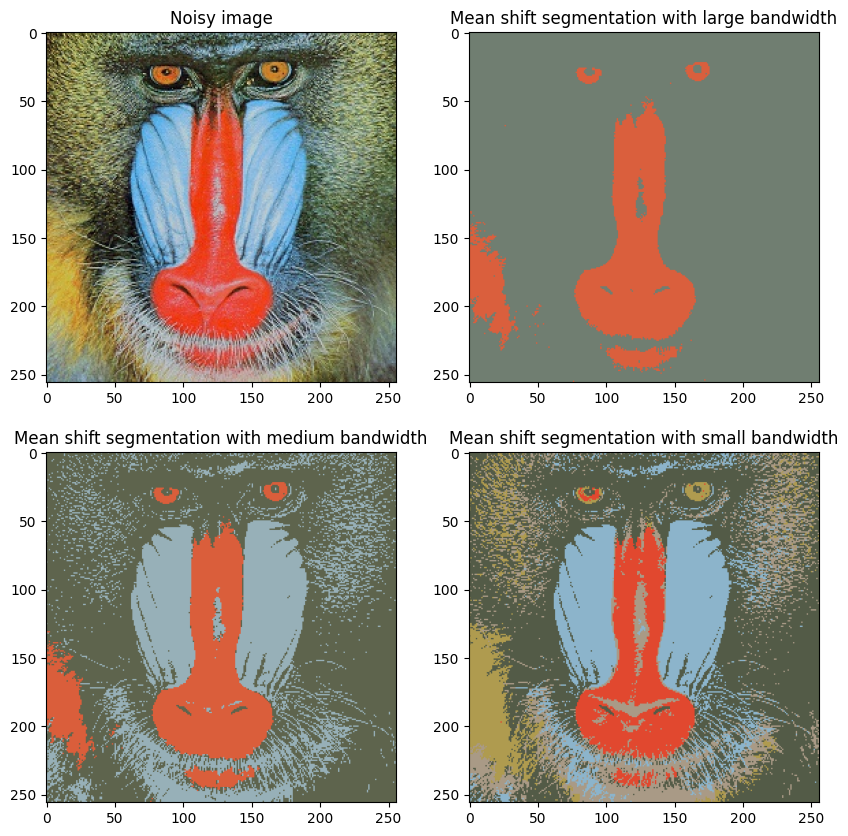

In [12]:
# Read image in RGB
img = cv2.cvtColor(cv2.imread("./images/segmentation.jpg"), cv2.COLOR_BGR2RGB)

# Mean shift with quantile values 0.2, 0.1 and 0.05
ms1 = myMeanShift(img, 0.2)
ms2 = myMeanShift(img, 0.1)
ms3 = myMeanShift(img, 0.05)

# Display the results
plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(img), plt.title("Noisy image")
plt.subplot(222), plt.imshow(ms1), plt.title('Mean shift segmentation with large bandwidth')
plt.subplot(223), plt.imshow(ms2), plt.title('Mean shift segmentation with medium bandwidth')
plt.subplot(224), plt.imshow(ms3), plt.title('Mean shift segmentation with small bandwidth')
plt.show()

high bandwidth = less clusters

medium = more clusers

small = much more clusters and detail.

bigger the bandwidth less detail less noise and vice versa 

scray image.

**b)** The mean shift algorithm can be sensitive to the noise in the image. Therefore, it is usually recommended to smooth the image with a simple filter before applying the segmentation. Compare the results of applying the median filtering on the `noise_example.jpg` image (in RGB). Smoothing can be easily done in OpenCV with `medianBlur`..

Mean shift filtering time with estimated bandwith 21.96: 29.96304 seconds
Number of estimated clusters : 5
Mean shift filtering time with estimated bandwith 18.42: 15.37154 seconds
Number of estimated clusters : 7


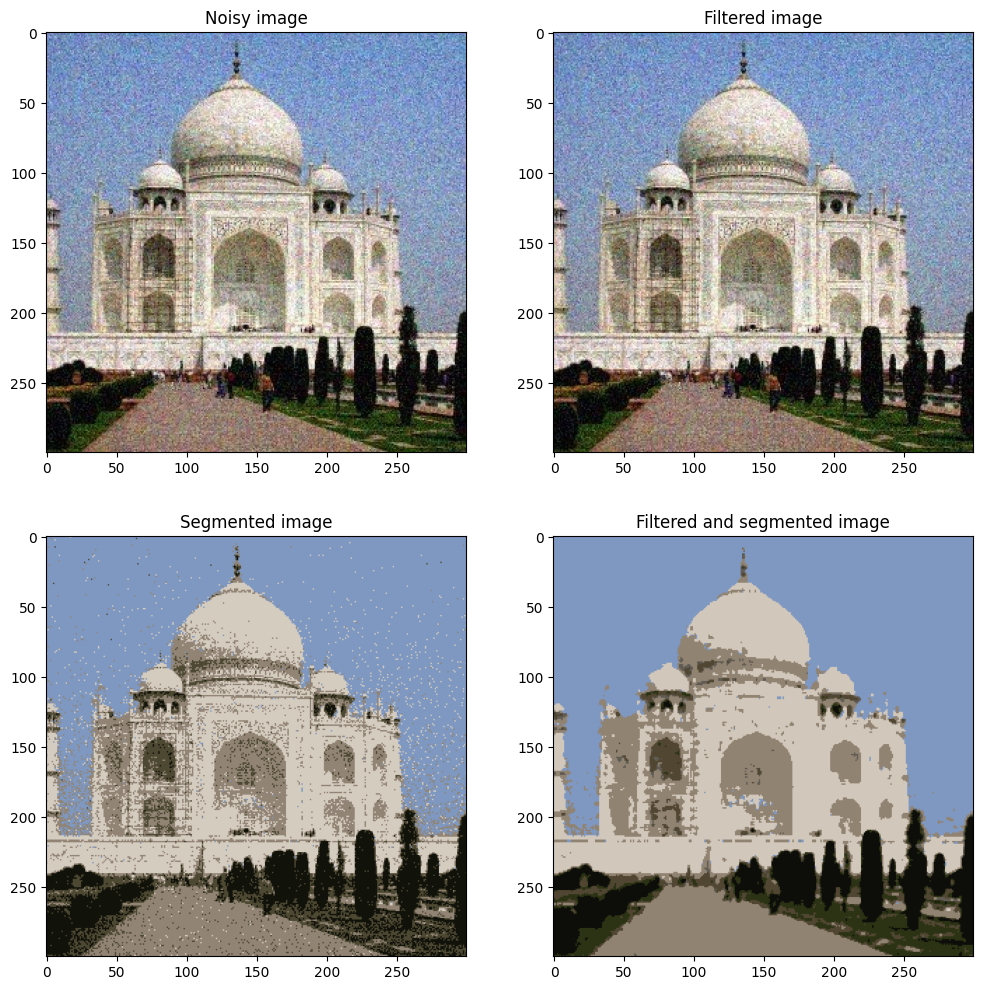

In [14]:
# Load the image
img = cv2.cvtColor(cv2.imread("./images/noise_example.jpg"), cv2.COLOR_BGR2RGB)

# Filtered image
img_blur = cv2.medianBlur(img, 3) # kernel size of 3

# Mean shift with bandwidth quantile of 0.05
segmented_image = myMeanShift(img, 0.05)
segmented_image_filtered = myMeanShift(img_blur, 0.05)

# Display the results
plt.figure(figsize=(12,12))
plt.subplot(221), plt.imshow(img), plt.title("Noisy image")
plt.subplot(222), plt.imshow(img), plt.title("Filtered image")
plt.subplot(223), plt.imshow(segmented_image), plt.title('Segmented image')
plt.subplot(224), plt.imshow(segmented_image_filtered), plt.title('Filtered and segmented image')
plt.show()

## Contact
### Course teacher
Professor Kjersti Engan, room E-431,
E-mail: kjersti.engan@uis.no

### Teaching assistant
Md Sazidur Rahman, room E-401
E-mail: md.s.rahman@uis.no


## References

[1] S. Birchfeld, Image Processing and Analysis. Cengage Learning, 2016.

[2] I. Austvoll, "Machine/robot vision part I," University of Stavanger, 2018. Compendium, CANVAS.
